In [ ]:
# get the climate data
# consider Geophysical Fluid Dynamics Laboratory Earth System Model 2G 
# Differences in the ocean mean state include the thermocline depth 
# being relatively deep in ESM2M and relatively shallow in ESM2G compared to observations
# ref https://www.usgs.gov/publications/gfdls-esm2-global-coupled-climate-carbon-earth-system-models-part-i-physical
# import os
# import pathlib

# import rioxarray as rxr
# import xarray as xr
# import geopandas as gpd

In [ ]:
# # Define the current working directory (replace `cwd` with the appropriate path)
# cwd = os.getcwd()
# # Define file paths with name of county shapefile downloaded
# co_path = os.path.join(cwd, 'boulder_county.shp')
# # Read the boulder_county shapefile for climate boundary
# boulder_climate_gdf = gpd.read_file(co_path)
# boulder_climate_gdf.plot()

In [ ]:
# def convert_longitude(longitude):
#     """convert longitude from 0 to 360 to -180 to 180"""
#     return(longitude - 360) if longitude > 180 else longitude

# # Catalog http://thredds.northwestknowledge.net:8080/thredds/catalog.html
# # GDFL-ESM2G is a US model http://thredds.northwestknowledge.net:8080/thredds/catalog/MACAV2/GFDL-ESM2G/catalog.html
# climate_est_url1 = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/GFDL-ESM2G/macav2metdata_vpd_GFDL-ESM2G_r1i1p1_rcp85_2016_2020_CONUS_monthly.nc' #2016-2020 model
# # TRY BNU
# # climate_est_url1 = 'http://thredds.northwestknowledge.net:8080/thredds/catalog/MACAV2/BNU-ESM/catalog.html?dataset=REACCHDatasetScan_BNU-ESM_MACAV2/macav2metdata_vpd_BNU-ESM_r1i1p1_rcp85_2016_2020_CONUS_monthly.nc' #BNU
# # # look at est then actual 2016-2020 then 2036-2040?

# climate_est_ds1 = xr.open_dataset(climate_est_url1).squeeze()
# # climate_est_ds1.lon = [convert_longitude(lon) for lon in climate_est_ds1.lon]

# climate_est_url1

In [ ]:
# climate_est_ds1

In [ ]:
# climate_est_ds1.rio.clip_box(*boulder_climate_gdf.to.crs(climate_est_ds1.rio.crs).total_bounds)

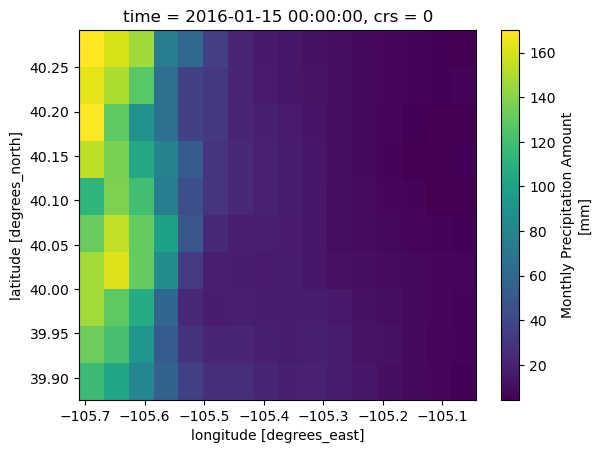

In [5]:
clipped_ds.plot()


In [8]:
import os
import geopandas as gpd
import xarray as xr
import rioxarray as rxr

# Define the current working directory (replace `cwd` with the appropriate path)
cwd = os.getcwd()

# Define file paths with the name of the county shapefile
def co_path(filename):
    return os.path.join(cwd, filename)

# Read the Boulder County shapefile for climate boundary
boulder_climate_gdf = gpd.read_file(co_path('boulder_county.shp'))

# Function to convert longitude from 0-360 to -180 to 180
def convert_longitude(lon):
    """Convert longitude from 0-360 to -180 to 180"""
    return (lon - 360) if lon > 180 else lon

# URL for climate data (precipitation in this case)
# 2016-2020
climate_est_url1 = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/GFDL-ESM2G/macav2metdata_pr_GFDL-ESM2G_r1i1p1_rcp85_2016_2020_CONUS_monthly.nc'  # Example URL for precipitation data
# # 2046-2050
# climate_est_url2 = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/GFDL-ESM2G/macav2metdata_pr_GFDL-ESM2G_r1i1p1_rcp85_2046_2050_CONUS_monthly.nc'  # Example URL for precipitation data

# Load the climate datasets
climate_est_ds1 = xr.open_dataset(climate_est_url1).squeeze()
# climate_est_ds2 = xr.open_dataset(climate_est_url2).squeeze()

# Adjust the longitude values from 0-360 to -180 to 180
climate_est_ds1 = climate_est_ds1.assign_coords(
    lon=((climate_est_ds1.lon + 180) % 360 - 180)
).sortby('lon')

# climate_est_ds2 = climate_est_ds2.assign_coords(
#     lon=((climate_est_ds1.lon + 180) % 360 - 180)
# ).sortby('lon')

# Extract the precipitation variable as a DataArray
precipitation = climate_est_ds1['precipitation']

# Ensure spatial dimensions are set for the precipitation DataArray
precipitation = precipitation.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)

# Write CRS for the precipitation DataArray
precipitation = precipitation.rio.write_crs("EPSG:4326", inplace=True)

# Select a specific time slice (e.g., the first time step)
precipitation_time_slice = precipitation.isel(time=0)

# Ensure spatial dimensions are retained for the time slice
precipitation_time_slice = precipitation_time_slice.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)



# Clip the dataset to the boundaries of Boulder County
boulder_climate_bounds = boulder_climate_gdf.to_crs(precipitation_time_slice.rio.crs).total_bounds
clipped_ds = precipitation_time_slice.rio.clip_box(*boulder_climate_bounds)

# Reproject the clipped dataset to UTM Zone 13N
utm_crs = "EPSG:32613"  # EPSG code for UTM Zone 13N
clipped_ds_utm = clipped_ds.rio.reproject(utm_crs)

# Export the reprojected dataset to a GeoTIFF file
output_path = co_path('boulder_precipitation_utm13.tif')
clipped_ds_utm.rio.to_raster(output_path)

print(f"GeoTIFF saved to {output_path}")


GeoTIFF saved to c:\Users\gpaul\Documents\GitHub\bluespruce\boulder_precipitation_utm13.tif


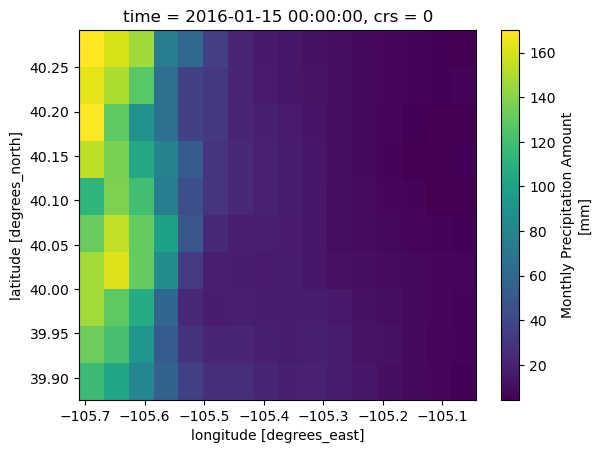

In [9]:
clipped_ds.plot()

GeoTIFF 1 saved to c:\Users\gpaul\Documents\GitHub\bluespruce\boulder_precipitation_utm13_2016_2020.tif
GeoTIFF 2 saved to c:\Users\gpaul\Documents\GitHub\bluespruce\boulder_precipitation_utm13_2046_2050.tif


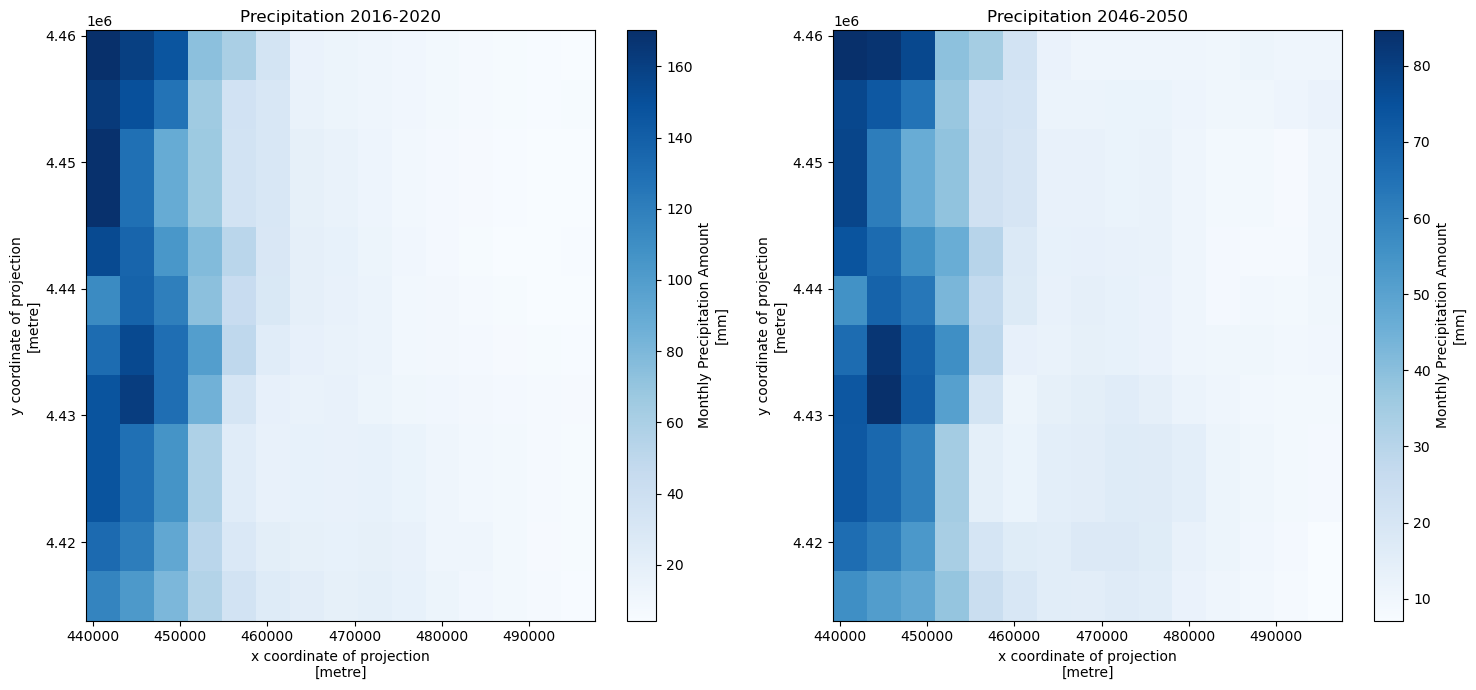

In [10]:
import os
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt

# Define the current working directory (replace `cwd` with the appropriate path)
cwd = os.getcwd()

# Define file paths with the name of the county shapefile
def co_path(filename):
    return os.path.join(cwd, filename)

# Read the Boulder County shapefile for climate boundary
boulder_climate_gdf = gpd.read_file(co_path('boulder_county.shp'))

# Function to convert longitude from 0-360 to -180 to 180
def convert_longitude(lon):
    """Convert longitude from 0-360 to -180 to 180"""
    return (lon - 360) if lon > 180 else lon

# URL for climate data (precipitation in this case)
# 2016-2020
climate_est_url1 = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/GFDL-ESM2G/macav2metdata_pr_GFDL-ESM2G_r1i1p1_rcp85_2016_2020_CONUS_monthly.nc'  # Example URL for precipitation data
# 2046-2050
climate_est_url2 = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/GFDL-ESM2G/macav2metdata_pr_GFDL-ESM2G_r1i1p1_rcp85_2046_2050_CONUS_monthly.nc'  # Example URL for precipitation data

# Load the climate datasets
climate_est_ds1 = xr.open_dataset(climate_est_url1).squeeze()
climate_est_ds2 = xr.open_dataset(climate_est_url2).squeeze()

# Adjust the longitude values from 0-360 to -180 to 180 for both datasets
climate_est_ds1 = climate_est_ds1.assign_coords(
    lon=((climate_est_ds1.lon + 180) % 360 - 180)
).sortby('lon')

climate_est_ds2 = climate_est_ds2.assign_coords(
    lon=((climate_est_ds2.lon + 180) % 360 - 180)
).sortby('lon')

# Extract the precipitation variable as a DataArray from both datasets
precipitation1 = climate_est_ds1['precipitation']
precipitation2 = climate_est_ds2['precipitation']

# Ensure spatial dimensions are set for both DataArrays
precipitation1 = precipitation1.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
precipitation2 = precipitation2.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)

# Write CRS for both DataArrays
precipitation1 = precipitation1.rio.write_crs("EPSG:4326", inplace=True)
precipitation2 = precipitation2.rio.write_crs("EPSG:4326", inplace=True)

# Select a specific time slice (e.g., the first time step) for both
precipitation_time_slice1 = precipitation1.isel(time=0)
precipitation_time_slice2 = precipitation2.isel(time=0)

# Ensure spatial dimensions are retained for the time slices
precipitation_time_slice1 = precipitation_time_slice1.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
precipitation_time_slice2 = precipitation_time_slice2.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)

# Clip the datasets to the boundaries of Boulder County
boulder_climate_bounds = boulder_climate_gdf.to_crs(precipitation_time_slice1.rio.crs).total_bounds
clipped_ds1 = precipitation_time_slice1.rio.clip_box(*boulder_climate_bounds)
clipped_ds2 = precipitation_time_slice2.rio.clip_box(*boulder_climate_bounds)

# Reproject the clipped datasets to UTM Zone 13N
utm_crs = "EPSG:32613"  # EPSG code for UTM Zone 13N
clipped_ds1_utm = clipped_ds1.rio.reproject(utm_crs)
clipped_ds2_utm = clipped_ds2.rio.reproject(utm_crs)

# Export the reprojected datasets to GeoTIFF files
output_path1 = co_path('boulder_precipitation_utm13_2016_2020.tif')
output_path2 = co_path('boulder_precipitation_utm13_2046_2050.tif')
clipped_ds1_utm.rio.to_raster(output_path1)
clipped_ds2_utm.rio.to_raster(output_path2)

print(f"GeoTIFF 1 saved to {output_path1}")
print(f"GeoTIFF 2 saved to {output_path2}")

# Plot both datasets side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the 2016-2020 precipitation
clipped_ds1_utm.plot(ax=axs[0], cmap='Blues')
axs[0].set_title('Precipitation 2016-2020')

# Plot the 2046-2050 precipitation
clipped_ds2_utm.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Precipitation 2046-2050')

plt.tight_layout()
plt.show()
